In [379]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color']
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 

In [381]:
df = pd.read_csv('content.csv')
df_mls = df.loc[df['Page'] == 'Major League Soccer (MLS)']

In [382]:
#df_mls.columns=df_mls.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df_mls.rename(columns={'total_actions_%_fans': 'total_actions_percent_fans'},inplace = True)

In [383]:
## CHANGING INTO DATETIME FORMAT
df_mls['Created Time'] =  pd.to_datetime(df_mls['Created Time'], infer_datetime_format=True)

df_mls['new_time'] = [d.time() for d in df_mls['Created Time']]
df_mls['new_date'] = [d.date() for d in df_mls['Created Time']]

In [384]:
df_mls['new_date'] = pd.to_datetime(df_mls['new_date'], infer_datetime_format=True)

In [385]:
df_mls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5190 entries, 0 to 5189
Data columns (total 29 columns):
Page                    5190 non-null object
Fans                    5190 non-null object
Category                5190 non-null object
Total Actions           5190 non-null object
Total Actions % Fans    5190 non-null object
Word Count              5190 non-null object
Post ID                 5190 non-null object
Message                 5108 non-null object
Link                    5130 non-null object
Link to Likes           5065 non-null object
Post Type               5190 non-null object
Promoted                5190 non-null bool
Likes Count             5190 non-null object
Reactions Count         5190 non-null object
Comments Count          5190 non-null object
Shares Count            5190 non-null object
Lifetime Video Views    2555 non-null object
Created Time            5190 non-null datetime64[ns]
Promoted.1              5190 non-null bool
Call to Comment         5190 non-n

In [386]:
# CHANGING DATA TYPE TO FLOAT
df_mls['Total Actions'] = df_mls['Total Actions'].str.replace(',', '').astype(float)

In [387]:
## STORING DATA BASED ON POST TYPE CATEGORIES
df_photo = df_mls.loc[df_mls['Post Type'] =='photo']
df_event= df_mls.loc[df_mls['Post Type'] =='event']
df_link = df_mls.loc[df_mls['Post Type'] =='link']
df_status =df_mls.loc[df_mls['Post Type'] =='status']
df_video = df_mls.loc[df_mls['Post Type'] =='video']

In [388]:
cols = ['Word Count','Post ID','Message','Link','Link to Likes','Page','Destination URLs']

cols4 = ['Lifetime Video Views']

In [389]:
for i in df_photo.columns:
    if df_photo[f'{i}'].dtypes == 'bool':
        df_photo[f'{i}'] = le.fit_transform(df_photo[f'{i}'])
    

In [390]:
df_photo['Category'] = le.fit_transform(df_photo['Category'])
df_photo.drop(cols, axis=1, inplace=True)

In [391]:
#df_photo['Created Time'] =  pd.to_datetime(df_photo['Created Time'], infer_datetime_format=True)

In [392]:
for i in df_photo.columns:
    if df_photo[f'{i}'].dtypes == 'bool':
        df_photo[f'{i}'] = le.fit_transform(df_photo[f'{i}'])
    

In [393]:
df_photo['Category'] = le.fit_transform(df_photo['Category'])

## FILING NAn VALUES IN LIFE TIME VIDEO COLUMN

In [394]:
df_photo['Lifetime Video Views']=df_photo['Lifetime Video Views'].fillna(0)

In [395]:
df_event['Lifetime Video Views']= df_event['Lifetime Video Views'].fillna(0)

In [396]:
df_link['Lifetime Video Views']=df_link['Lifetime Video Views'].fillna(0)

In [397]:
df_status['Lifetime Video Views']=df_status['Lifetime Video Views'].fillna(0)

In [398]:
df_video['Lifetime Video Views']=df_video['Lifetime Video Views'].fillna(0)


## FINDING MAXIMUM AND MINIMUM TIMESTAMP VALUES FOR EACH POST TYPE"

In [399]:
df_photo['new_date'].min(), df_photo['new_date'].max()

(Timestamp('2018-01-09 00:00:00'), Timestamp('2018-12-27 00:00:00'))

In [400]:
df_event['new_date'].min(), df_event['new_date'].max()

(NaT, NaT)

In [401]:
df_status['new_date'].min(), df_status['new_date'].max()

(Timestamp('2018-03-03 00:00:00'), Timestamp('2018-12-08 00:00:00'))

In [402]:
df_mls['new_date'].min(), df_mls['new_date'].max()

(Timestamp('2018-01-01 00:00:00'), Timestamp('2018-12-31 00:00:00'))

In [403]:
df_video['new_date'].min(), df_video['new_date'].max()

(Timestamp('2018-01-01 00:00:00'), Timestamp('2018-12-31 00:00:00'))

In [404]:
## Sorting Values for each photo type
df_photo = df_photo.sort_values('new_date')
df_event = df_event.sort_values('new_date')
df_link = df_link.sort_values('new_date')
df_status = df_status.sort_values('new_date')
df_video = df_video.sort_values('new_date')

In [439]:
df_photo

,Total Actions
new_date,
2018-01-09,86.0
2018-01-12,74.0
2018-01-17,31.0
2018-01-19,2264.0
2018-01-23,315.0
2018-01-24,109.0
2018-01-25,1650.0
2018-02-03,118.0
2018-02-04,622.0


In [406]:
## Group by for each post type
df_photo =df_photo.groupby('new_date')['Total Actions'].sum().reset_index()
df_link =df_link.groupby('new_date')['Total Actions'].sum().reset_index()
df_status =df_status.groupby('new_date')['Total Actions'].sum().reset_index()
df_video =df_video.groupby('new_date')['Total Actions'].sum().reset_index()

In [407]:
#df_photo

In [408]:
df_photo = df_photo.set_index('new_date')
df_photo.index

DatetimeIndex(['2018-01-09', '2018-01-12', '2018-01-17', '2018-01-19',
               '2018-01-23', '2018-01-24', '2018-01-25', '2018-02-03',
               '2018-02-04', '2018-02-09',
               ...
               '2018-12-04', '2018-12-05', '2018-12-06', '2018-12-07',
               '2018-12-08', '2018-12-09', '2018-12-10', '2018-12-11',
               '2018-12-12', '2018-12-27'],
              dtype='datetime64[ns]', name='new_date', length=187, freq=None)

In [409]:
## Group by for each post type
#df_link = df_link.groupby('new_date')['total_actions'].sum().reset_index()
df_link = df_link.set_index('new_date')
df_link.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', name='new_date', length=340, freq=None)

In [410]:
## Group by for each post type
#df_status = df_status.groupby('new_date')['total_actions'].sum().reset_index()
df_status = df_status.set_index('new_date')
df_status.index

DatetimeIndex(['2018-03-03', '2018-03-04', '2018-03-06', '2018-03-10',
               '2018-03-11', '2018-03-31', '2018-04-07', '2018-04-08',
               '2018-04-11', '2018-04-13', '2018-04-15', '2018-04-18',
               '2018-04-22', '2018-04-29', '2018-05-05', '2018-05-13',
               '2018-05-19', '2018-05-20', '2018-05-25', '2018-05-27',
               '2018-06-02', '2018-06-09', '2018-06-21', '2018-06-30',
               '2018-07-01', '2018-07-06', '2018-07-11', '2018-07-14',
               '2018-07-15', '2018-07-28', '2018-07-29', '2018-08-19',
               '2018-09-01', '2018-09-13', '2018-09-14', '2018-10-07',
               '2018-10-20', '2018-11-06', '2018-11-13', '2018-11-16',
               '2018-11-28', '2018-12-01', '2018-12-08'],
              dtype='datetime64[ns]', name='new_date', freq=None)

In [411]:
## Group by for each post type
#df_video = df_video.groupby('new_date')['total_actions'].sum().reset_index()
df_video = df_video.set_index('new_date')
df_video.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2018-12-09', '2018-12-10', '2018-12-11', '2018-12-13',
               '2018-12-24', '2018-12-25', '2018-12-26', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', name='new_date', length=350, freq=None)

In [440]:
y_photo = df_photo['Total Actions'].resample('MS').mean()
y_photo

new_date
2018-01-01     647.000000
2018-02-01     740.333333
2018-03-01    3417.866667
2018-04-01    1062.777778
2018-05-01     909.000000
2018-06-01    4178.588235
2018-07-01    1321.526316
2018-08-01    2033.555556
2018-09-01     876.571429
2018-10-01    2142.095238
2018-11-01    2543.388889
2018-12-01    3764.500000
Freq: MS, Name: Total Actions, dtype: float64

In [413]:
y_video

new_date
2018-01-01     2382.833333
2018-02-01     1430.035714
2018-03-01    12997.290323
2018-04-01     7872.166667
2018-05-01     8458.633333
2018-06-01     4690.800000
2018-07-01     9239.580645
2018-08-01    14299.387097
2018-09-01    25609.400000
2018-10-01     9646.935484
2018-11-01     4938.066667
2018-12-01     3970.833333
Freq: MS, Name: Total Actions, dtype: float64

In [414]:
y_video = df_video['Total Actions'].resample('MS').mean()

In [415]:
y_status = df_status['Total Actions'].resample('MS').mean()

In [416]:
#y_status

In [417]:
y_link = df_link['Total Actions'].resample('MS').mean()
y_link

new_date
2018-01-01    3580.967742
2018-02-01    2770.392857
2018-03-01    2262.000000
2018-04-01    1568.000000
2018-05-01    2165.321429
2018-06-01    2992.148148
2018-07-01    1443.800000
2018-08-01    1818.357143
2018-09-01    1672.241379
2018-10-01    2046.766667
2018-11-01    2864.833333
2018-12-01    4655.416667
Freq: MS, Name: Total Actions, dtype: float64

## PLOTTING GRAPHS FOR TIME SERIES

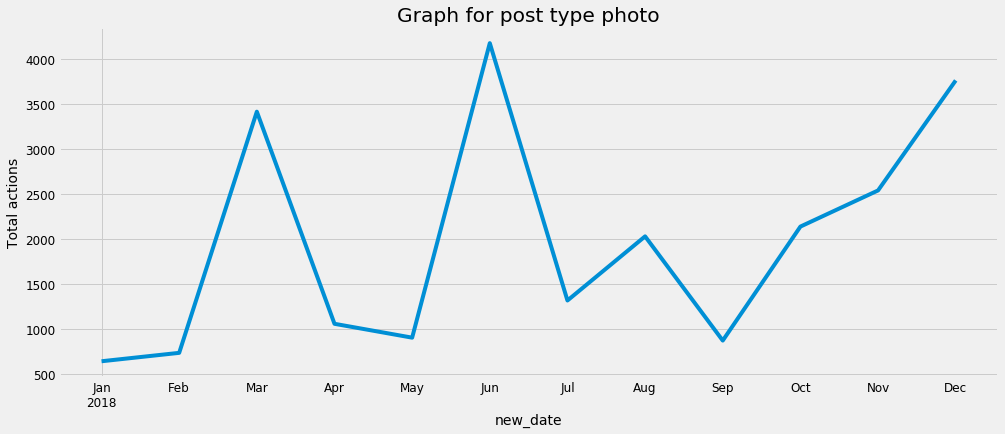

In [418]:
y_photo.plot(figsize=(15, 6))
plt.ylabel("Total actions")
plt.title("Graph for post type photo")
plt.show()

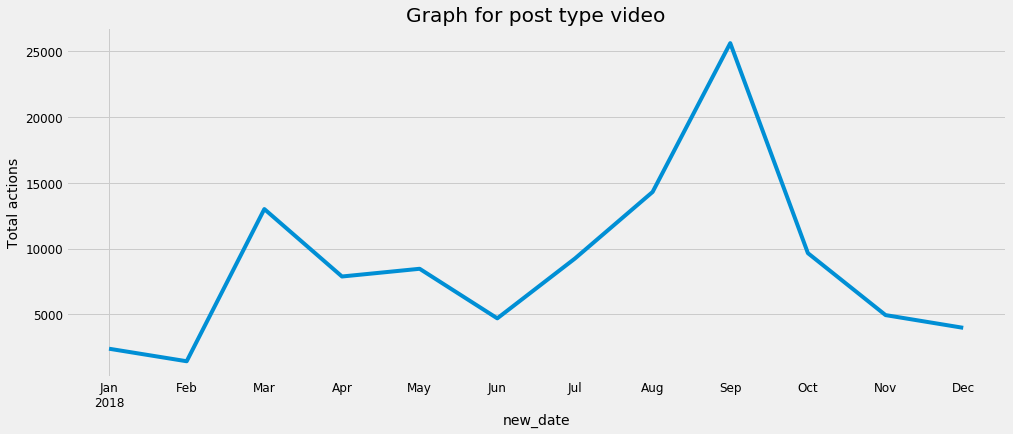

In [419]:
y_video.plot(figsize=(15, 6))
plt.ylabel("Total actions")
plt.title("Graph for post type video")
plt.show()

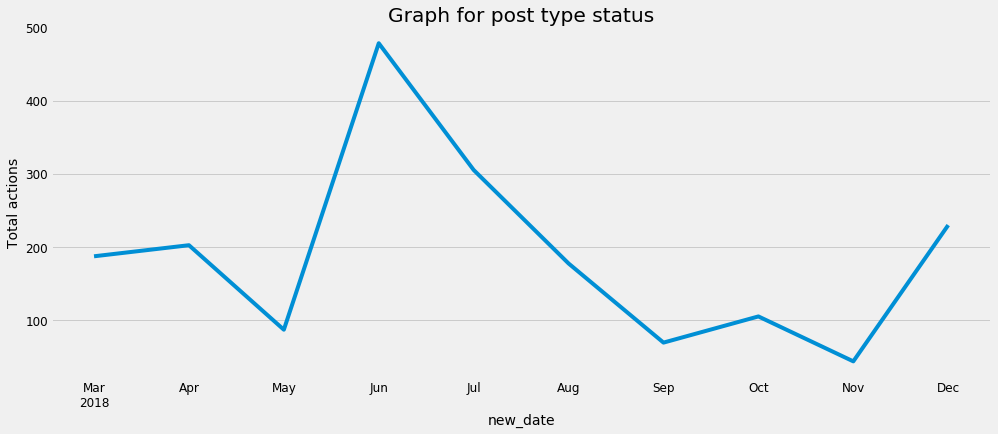

In [420]:
y_status.plot(figsize=(15, 6))
plt.ylabel("Total actions")
plt.title("Graph for post type status")
plt.show()

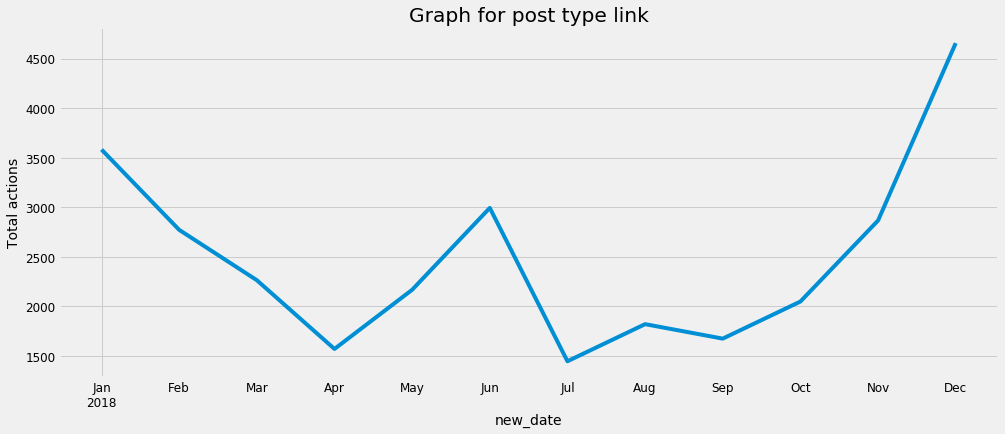

In [421]:
y_link.plot(figsize=(15, 6))
plt.ylabel("Total actions")
plt.title("Graph for post type link")
plt.show()

In [422]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [423]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y_photo,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:204.4764203592698
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:186.2567775821634
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:181.53364026487898
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:158.43964764794126
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:199.61826844935575
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:178.6607326412261
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:180.31207398287597
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:160.02752619307572


In [424]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y_link,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:205.72316139876523
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:181.36212615586084
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:166.736934613033
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:152.9156307623067
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:184.994757707248
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:170.53153256748269
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:168.6505716543175
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:154.76503879493106


In [425]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y_status,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:125.34330344913037
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:110.81388778311694
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:107.97473892256207
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:94.96908305465871
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:120.94399488713152
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:108.18460599558118
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:108.64991436041623
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:96.84843039419863


In [426]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y_video,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:238.57818017609856
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:215.30931085201257
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:209.91757178194408
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:189.32432041944205
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:230.40407560448355
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:212.7263375081613
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:211.5812537719758
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:189.6882316522068


In [427]:
#from pylab import rcParams
#rcParams['figure.figsize'] = 18, 8
#decomposition = sm.tsa.seasonal_decompose(y_photo, model='additive',freq=11,two_sided=True,filt=None)
#fig = decomposition.plot()
#plt.show()

In [428]:
#from pylab import rcParams
#rcParams['figure.figsize'] = 18, 8
#decomposition = sm.tsa.seasonal_decompose(y_video, model='additive',freq=11,two_sided=True,filt=None)
#fig = decomposition.plot()
#plt.show()

In [429]:
mod = sm.tsa.statespace.SARIMAX(y_photo,
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=True,
                                enforce_invertibilit=True)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1902      0.944     -0.202      0.840      -2.041       1.660
ma.L1         -0.7083      0.856     -0.828      0.408      -2.386       0.969
sigma2      1.988e+06    9.2e+05      2.160      0.031    1.84e+05    3.79e+06


In [433]:
mod = sm.tsa.statespace.SARIMAX(y_status,
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibilit=True)
result1 = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1902      0.944     -0.202      0.840      -2.041       1.660
ma.L1         -0.7083      0.856     -0.828      0.408      -2.386       0.969
sigma2      1.988e+06    9.2e+05      2.160      0.031    1.84e+05    3.79e+06


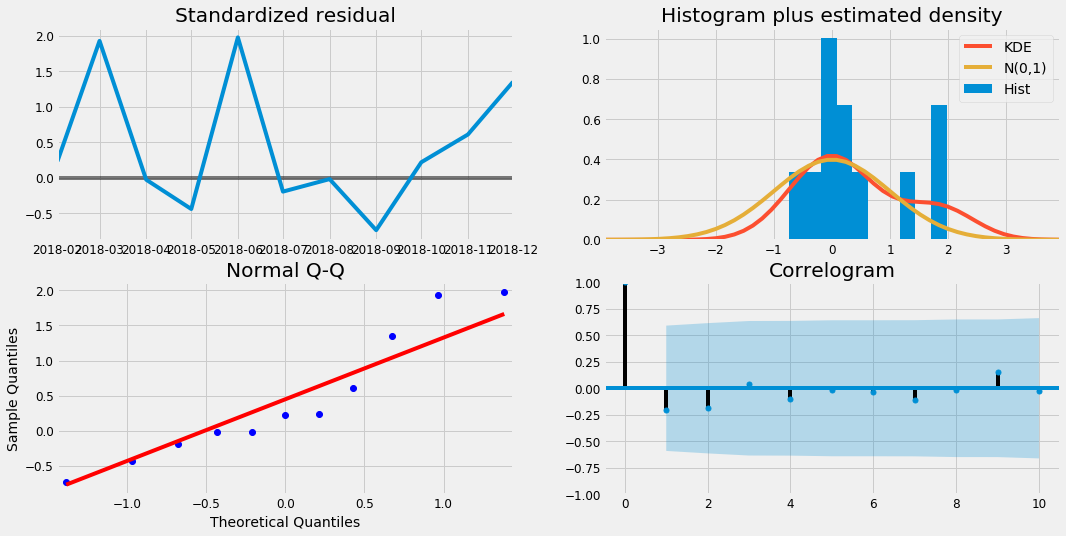

In [431]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

new_date
2018-01-01    4227.703629
2018-02-01    3576.604200
2018-03-01    3462.511965
2018-04-01    3940.705598
2018-05-01    4335.427928
2018-06-01    4150.903400
2018-07-01    4365.726302
2018-08-01    4824.051843
2018-09-01    4679.644065
2018-10-01    4594.730904
2018-11-01    4444.542971
2018-12-01    4619.809226
Freq: MS, Name: upper Total Actions, dtype: float64


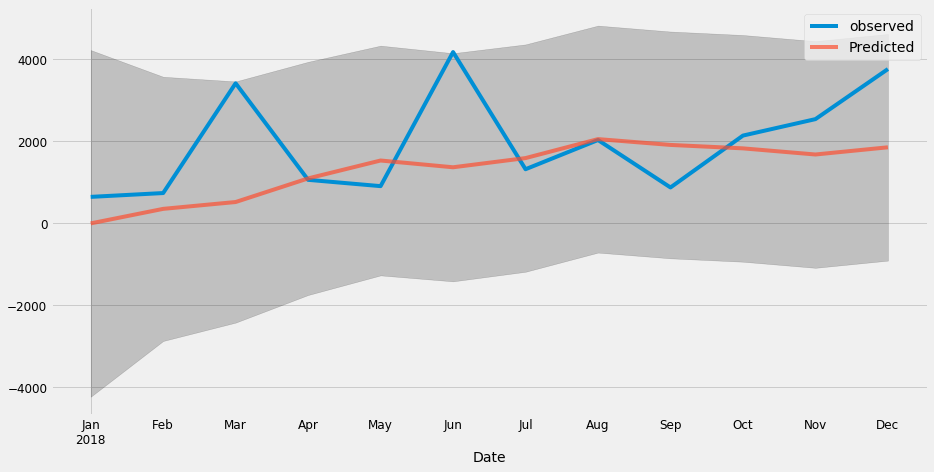

In [437]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()
print(pred_ci.iloc[:,1])
ax = y_photo['2018':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Predicted', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('')
plt.legend()
plt.show()

In [278]:
y_forecasted = pred.predicted_mean
#print(y_forecasted[0])
y_truth = y_photo['2018-01-01':]
#print(y_truth)
mse = ((y_forecasted[0] - y_truth) ** 2).mean()
#print(mse)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 5328659.08


In [279]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 2308.39


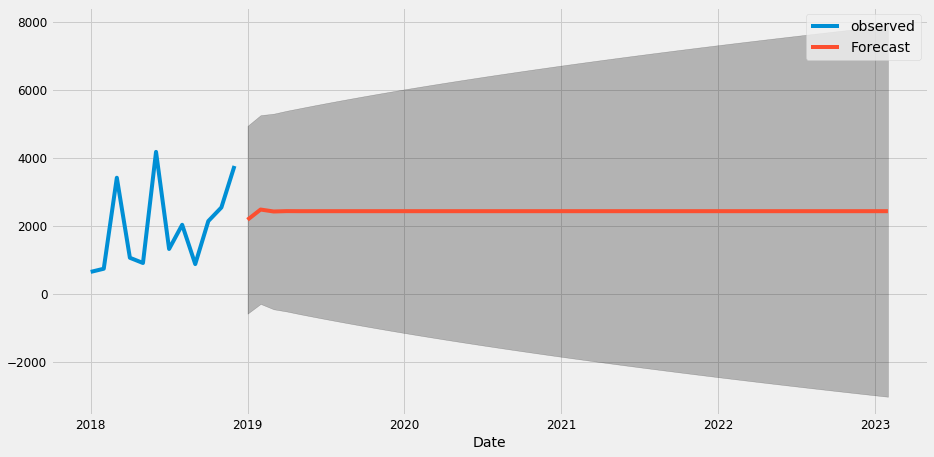

In [280]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax = y_photo.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('')
plt.legend()
plt.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5190 entries, 0 to 5189
Data columns (total 27 columns):
Page                    5190 non-null object
Fans                    5190 non-null object
Category                5190 non-null object
Total Actions           5190 non-null object
Total Actions % Fans    5190 non-null object
Word Count              5190 non-null object
Post ID                 5190 non-null object
Message                 5108 non-null object
Link                    5130 non-null object
Link to Likes           5065 non-null object
Post Type               5190 non-null object
Promoted                5190 non-null bool
Likes Count             5190 non-null object
Reactions Count         5190 non-null object
Comments Count          5190 non-null object
Shares Count            5190 non-null object
Lifetime Video Views    2555 non-null object
Created Time            5190 non-null object
Promoted.1              5190 non-null bool
Call to Comment         5190 non-null bool

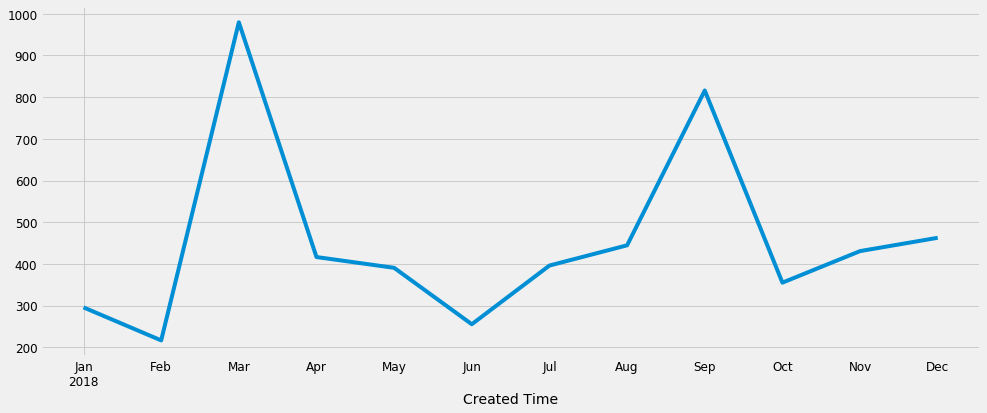

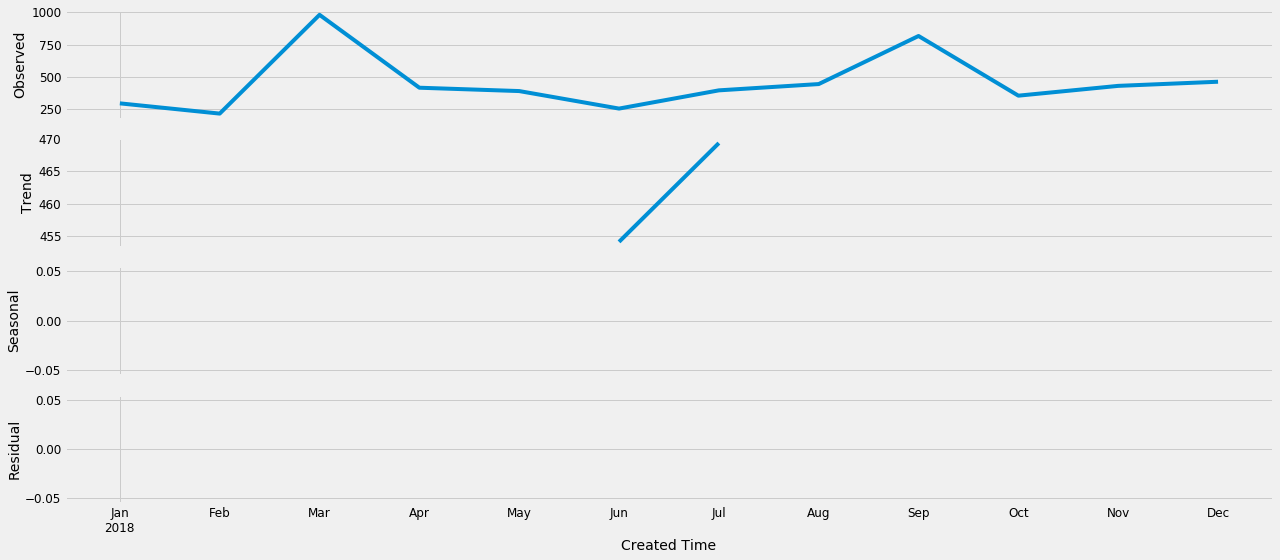

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:170.68473993925994
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:153.67518949139273
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:148.1211031947867
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:122.46877763638417
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:162.64664145376585
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:145.28541245365443
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:147.03714819946651
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:123.91609072953148
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1350      1.276     -0.106      0.916      -2.636       2.366
ma.L1         -0.9946     35.232     

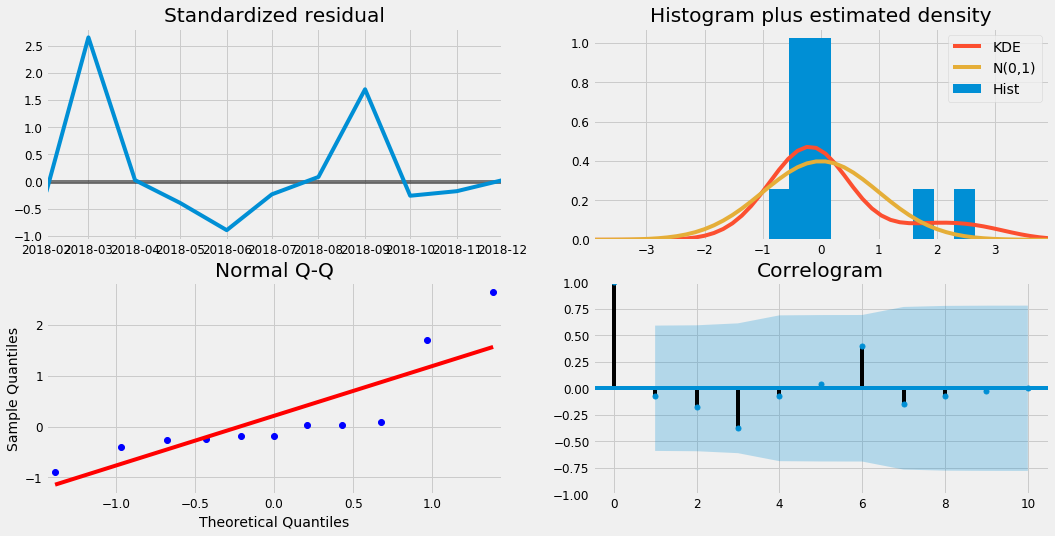

Created Time
2018-01-01    2065.970385
2018-02-01     921.426973
2018-03-01     790.344196
2018-04-01     910.312720
2018-05-01     970.472666
2018-06-01     943.181846
2018-07-01     917.228422
2018-08-01     884.925556
2018-09-01     877.107027
2018-10-01     868.909646
2018-11-01     922.615380
2018-12-01     906.669118
Freq: MS, Name: upper Total Actions, dtype: float64


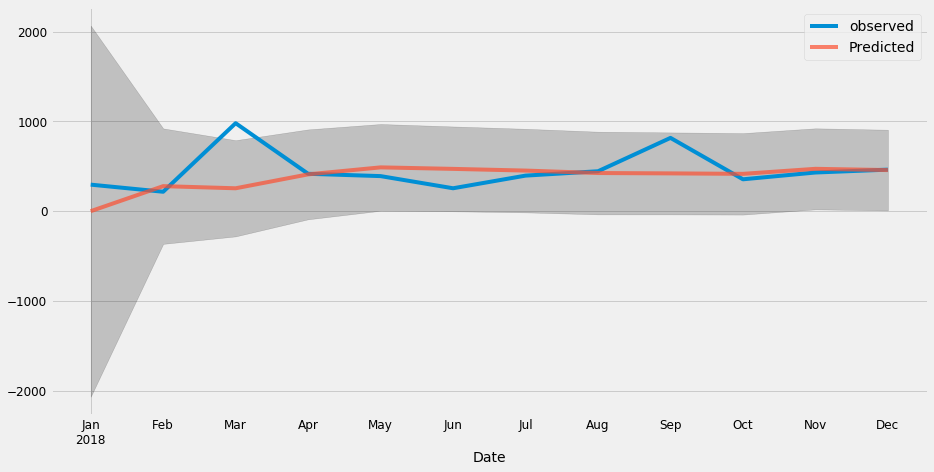

The Mean Squared Error of our forecasts is 252540.22
The Root Mean Squared Error of our forecasts is 502.53


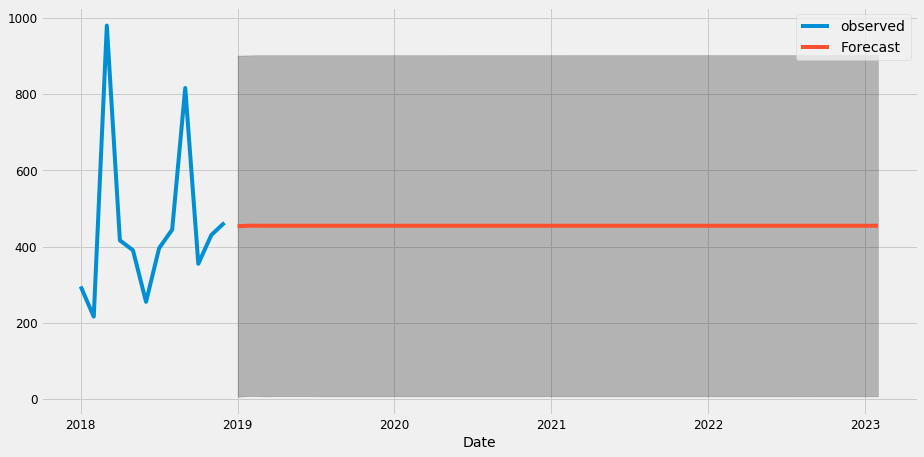

In [438]:


import pandas as pd
import datetime



df = pd.read_csv('content.csv')

x = set(df['Post Type'])


df1 = df.loc[df['Page']=='Major League Soccer (MLS)']

df1.info()

x = set(df['Post Type'])


import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color']
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

#df1 = df1.loc[df1['Post Type'] =='photo']
#df2 = df.loc[df['Post Type'] =='event']
#df3 = df.loc[df['Post Type'] =='photos']
#df4 = df.loc[df['Post Type'] =='status']
df5 = df.loc[df['Post Type'] =='video']

df5

for i in df5.columns:
    if df5[f'{i}'].dtypes == 'bool':
        df5[f'{i}'] = le.fit_transform(df5[f'{i}'])

df1.info()

df5['Category'] = le.fit_transform(df5['Category'])

df5['Created Time'] =  pd.to_datetime(df5['Created Time'], infer_datetime_format=True)

df5['Created Time'].min(), df5['Created Time'].max()

df5.info()

cols = ['Word Count','Post ID','Message','Link','Link to Likes','Page','Destination URLs']

cols4 = ['Lifetime Video Views']

df5.drop(cols, axis=1, inplace=True)

df5['Category'] = le.fit_transform(df5['Category'])

df5.fillna(0)

df5['Lifetime Video Views'].fillna(0)

#df1['Lifetime Video Views'] = df1['Lifetime Video Views'].str.replace(',', '').astype(float)

df5['Total Actions'] = df5['Total Actions'].str.replace(',', '').astype(float)

df5 = df5.sort_values('Created Time')

df5.info()

df5 =df5.groupby('Created Time')['Total Actions'].sum().reset_index()

df5

df5 = df5.set_index('Created Time')
df5.index

y = df5['Total Actions'].resample('MS').mean()

y.plot(figsize=(15, 6))
plt.show()



y['2018':]

from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive',freq=11,two_sided=True,filt=None)
fig = decomposition.plot()
plt.show()

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=True,
                                enforce_invertibilit=True)
results = mod.fit()
print(results.summary().tables[1])

results.plot_diagnostics(figsize=(16, 8))
plt.show()

pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()
print(pred_ci.iloc[:,1])
ax = y['2018':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Predicted', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('')
plt.legend()
plt.show()

y_truth = y['2018-01-01':]

y_forecasted = pred.predicted_mean
#print(y_forecasted[0])
y_truth = y['2018-01-01':]
#print(y_truth)
mse = ((y_forecasted[0] - y_truth) ** 2).mean()
#print(mse)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('')
plt.legend()
plt.show()

